In [1]:
%matplotlib inline
import sys,os,glob,subprocess
import datetime
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 3
plt.rcParams['ytick.minor.size']  = 3

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec





In [2]:
def plot_sbps_eta_sequence(axPlot,base_path,stellar_psf_file,obj_sbp_file,objname,eta_list,x_min,x_max,x_major,x_minor,y_min,y_max):
    # Generate final plot
    print('{:s} - Generating plot of eta sequence...'.format(datetime.datetime.today().strftime('%Y-%m-%d %H:%M:%S')))
    plotfile = base_path + 'fig_eta_sequence_{:s}'.format(stellar_psf_file[:-5])
    rect_plot = [0.12,0.12,0.70,0.80]
    majorFormatter0 = matplotlib.ticker.FormatStrFormatter('%d')
    majorFormatter1 = matplotlib.ticker.FormatStrFormatter('%.1f')
    majorFormatter3 = matplotlib.ticker.FormatStrFormatter('%.3f')
    xlim = [x_min,x_max]
    ylim = [y_min,y_max]
    xlabel = 'Angular Distance From Photocenter [\'\']'
    ylabel = 'Normalized Surface Brightness'

    #axPlot = plt.axes(rect_plot)

    dist_photocenter_obj   = np.genfromtxt(base_path+obj_sbp_file,skip_header=0,usecols=(0))
    sb_normalized_obj      = np.genfromtxt(base_path+obj_sbp_file,skip_header=0,usecols=(1))
    sb_normalized_err_obj  = np.genfromtxt(base_path+obj_sbp_file,skip_header=0,usecols=(2))
    axPlot.plot(dist_photocenter_obj,sb_normalized_obj,lw=2,ls='-',color='#3a0ca3',label=objname,zorder=2)

    for eta in eta_list:
        modelcoma_plt_file = base_path + 'modelcoma_{:s}_{:.3f}.plt'.format(stellar_psf_file[:-5],eta)
        dist_photocenter = np.genfromtxt(modelcoma_plt_file,skip_header=0,usecols=(0))
        sb_normalized    = np.genfromtxt(modelcoma_plt_file,skip_header=0,usecols=(1))
        if eta == eta_list[0]:
            axPlot.plot(dist_photocenter,sb_normalized,lw=1,ls='-',color='#f72585',label=r'$\eta={:.3f}$'.format(eta),zorder=1)
        elif eta == eta_list[len(eta_list)-1]:
            axPlot.plot(dist_photocenter,sb_normalized,lw=1,ls='--',color='#f72585',label=r'$\eta={:.3f}$'.format(eta),zorder=1)
        else:
            axPlot.plot(dist_photocenter,sb_normalized,lw=0.5,ls='--',color='#f72585')
        
    axPlot.set_xlim(xlim)
    axPlot.set_ylim(ylim)
    axPlot.set_yscale('log')
 
    axPlot.set_xlabel(xlabel)#,fontsize=15)
    axPlot.set_ylabel(ylabel)#,fontsize=15)

    #plot_legend = plt.legend(loc='lower center',fontsize=14)
    plot_legend = plt.legend(fancybox=True, framealpha=1, 
           shadow=False, borderpad=1.0,#bbox_to_anchor=(.08,.35),
           frameon=False, loc='lower center', ncol=1)#,prop={'size': 14},facecolor='none') 
    plot_legend.get_frame().set_edgecolor('#000000')
    plt.grid(alpha=0.3)
    #plt.draw()

    
    print('{:s} - Generating plot of eta sequence complete.'.format(datetime.datetime.today().strftime('%Y-%m-%d %H:%M:%S')))
    return None


2024-11-14 13:57:19 - Generating plot of eta sequence...
2024-11-14 13:57:19 - Generating plot of eta sequence complete.


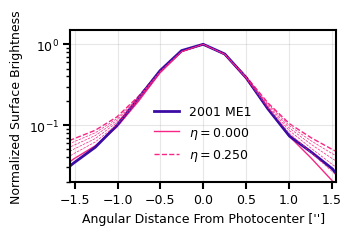

In [6]:
#plot_sbps_eta_sequence(base_path,stellar_psf_file,obj_sbp_file,objname,eta_list,x_min,x_max,x_major,x_minor,y_major,y_minor)
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(1, 1, tight_layout=False,figsize=(8.7*cm,5.*cm),sharex=False,sharey=False
                       ,gridspec_kw={'hspace': 0.35, 'wspace': 0.3})
plot_sbps_eta_sequence(axs,'./','psf_2001ME1_01.fits','sbp00.plt','2001 ME1',[0.00,0.05,0.10,0.15,0.20,0.25],-1.55,1.55,0.5,0.1,0.02,1.5)


plt.savefig('Figure12_Eta_Injection_Vector_shortened.pdf',
            format='pdf',bbox_inches='tight', dpi=600)

